In [363]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score
import os

In [311]:
pdv = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/PDV_Capoue.xlsx'
capoue = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/Thomas_de_Capoue_lemmas.xlsx'

In [312]:
df1 = pd.read_excel(pdv)
df2 = pd.read_excel(capoue)
df1.pop('Unnamed: 0')
df2.pop('Unnamed: 0')

0        0
1        1
2        2
3        3
4        4
      ... 
619    619
620    620
621    621
622    622
623    623
Name: Unnamed: 0, Length: 624, dtype: int64

In [313]:
df1['Numéro'] = df1['Numéro'].astype(str)
df2['Numéro'] = df2['Numéro'].astype(str)
df1['id'] = df1['ID']+'_'+df1['Numéro']
df2['id'] = df2['ID']+'_'+df2['Numéro']
df1 = df1[['id','textes']]
df2 = df2[['id','Text']]

In [314]:
df2 = df2.rename(columns={'Text':'textes'})
df1['gt'] = 1
df2['gt'] = 0

In [315]:
final = pd.concat([df1,df2],axis=0)

KMEANS

In [316]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(final['textes'])
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=0).fit(tfidf)

/home/noe/python/miniconda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [317]:
final['cluster'] = kmeans.labels_

In [318]:
from sklearn.metrics import confusion_matrix

In [319]:
y_true = final['gt']
y_pred = final['cluster']

In [320]:
confusion = confusion_matrix(y_true,y_pred)

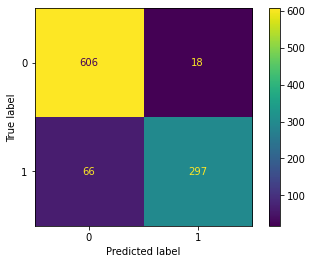

In [358]:
matrix_text = metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred)

In [322]:
f1_score = f1_score(y_true,y_pred)

In [323]:
f1_score

0.874074074074074

test on lemmas

In [418]:
df1 = pd.read_excel(pdv)
df2 = pd.read_excel(capoue)
df1.pop('Unnamed: 0')
df2.pop('Unnamed: 0')
df1['Numéro'] = df1['Numéro'].astype(str)
df2['Numéro'] = df2['Numéro'].astype(str)
df1['id'] = df1['ID']+'_'+df1['Numéro']
df2['id'] = df2['ID']+'_'+df2['Numéro']
df1 = df1[['id','lemmas']]
df2 = df2[['id','lemma']]
df2 = df2.rename(columns={'lemma':'lemmas'})
df1['gt'] = 1
df2['gt'] = 0
final = pd.concat([df1,df2],axis=0)
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(final['lemmas'])
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=None).fit(tfidf)
final['cluster'] = kmeans.labels_
y_true = final['gt']
y_pred = final['cluster']
confusion = confusion_matrix(y_true,y_pred)

/home/noe/python/miniconda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


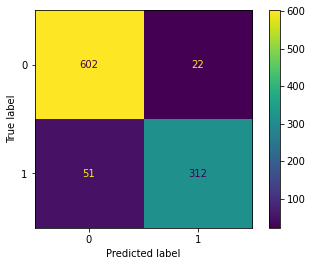

In [419]:
matrix_lemma = metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred)

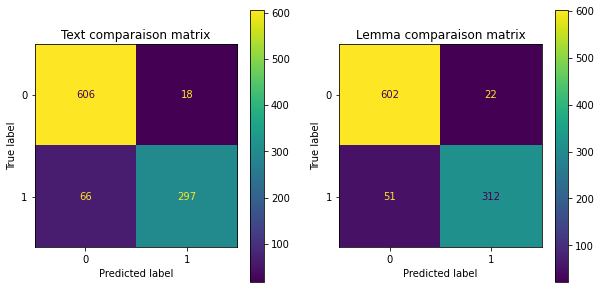

In [420]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
matrix_text.plot(ax=axs[0])
axs[0].set_title("Text comparaison matrix")
matrix_lemma.plot(ax=axs[1])
axs[1].set_title("Lemma comparaison matrix")
plt.savefig('Matrix_confusion_PDV_TDC.png',dpi=500)
plt.show()

In [346]:
precision = 606/(606+66)
recall = 606/(606+18)

In [351]:
f1 = 2*precision*recall / (precision+recall)

In [352]:
f1

0.9351851851851851